# Trabalho Avaliativo - Regressão
#### A 2º nota da disciplina será dividida em 3 partes, dois trabalhos de regressão (6 pontos) e um de classificação que passarei futuramente (4 pontos).

# 1) CRIANDO UM MODELO DE REGRESSÃO LINEAR SIMPLES (3 PONTOS) - MESMO GRUPO DOS TRABALHOS ANTERIORES
#### Com base nas formulas apresentadas abaixo, crie em python um algoritmo de regressão linear simples que receba os dados de um unico atributo e realize a predição do preço dos imoveis.

A fórmula básica da regressão linear simples é:

![Equação:](img/equacao.PNG)

Onde:

* y é a é a variável dependente (target previsto)
* x é a variável independente (feature conhecida)
* 𝛽0 é o coeficiente liner (interceptação no eixo y)
* 𝛽1 é o coeficiente de inclinação

Os coeficientes 𝛽0 e 𝛽1 podem ser calculados com fórmulas derivadas do método dos mínimos quadrados:

![Equação2:](img/equacao-betas.PNG)

* X𝑖 e Y𝑖 são os valores observados das variáveis independente e dependente, respectivamente.
* x̅ é a média dos valores de 
* $\bar{y}$ é a média dos valores de 
* n é o número de observações.

#### CARREGANDO OS DADOS

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

import pandas as pd
dataset = pd.DataFrame(housing.data)
dataset.columns = housing.feature_names
dataset['Price'] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


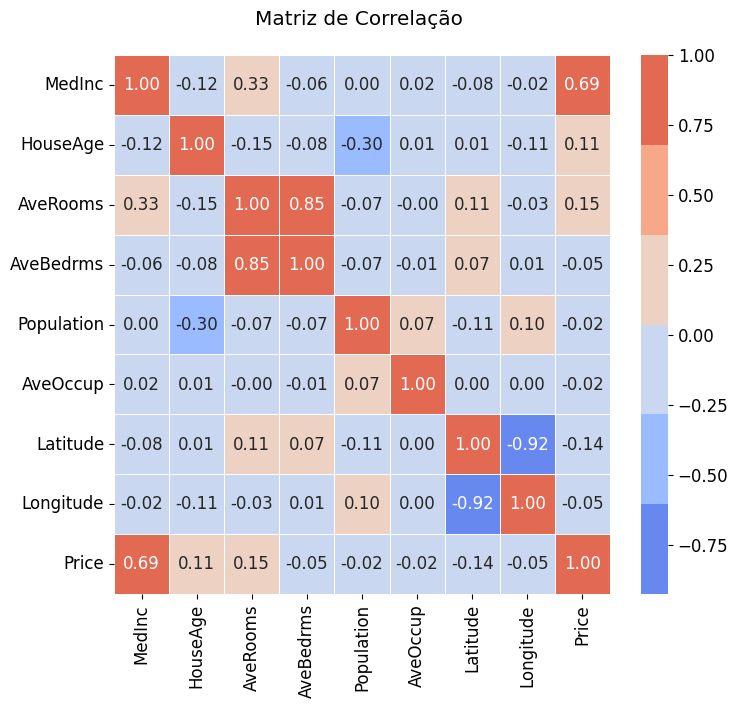

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

correlation_matrix = dataset.corr()
plt.rc('font', size=12)
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, cmap=sns.color_palette("coolwarm"), linewidths=.5, annot=True, fmt='.2f');
plt.title('Matriz de Correlação \n')
plt.show()

In [10]:
X = dataset['MedInc']
y = dataset['Price'] 

#### FAÇA SEU CÓDIGO AQUI:

# 2) REALIZANDO A PREDIÇÃO DE PREÇOS DE ALUGUEIS (3 PONTOS) - INDIVIDUAL

* A Atividade consiste em treinar um modelo para estimar o preço de alugueis (coluna **aluguel**)
* Os dados devem ser divididos em treino e teste.
* No teste devem ser calculadas as métricas: MSE, RMSE, MAE, MRAE, MAPE e R²
* O aluno que obtiver os melhores resultados receberá 10 como média geral da disciplina e estara automaticamente aprovado, ficando livre de todos os outros trabalhos.
* Observações: 
    * é necessário realizar pré-processamento. 
    * não se deve utilizar a coluna total_reais
    * podem utilizar técnicas como gridSearch, data augmentation, etc... para tentar melhorar os resultados.

In [44]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv("preco-de-aluguel.csv", index_col=0)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 794.0+ KB


In [72]:
# Renomear as colunas
df = df.rename(columns={
    'city': 'cidade', 
    'rooms': 'quartos', 
    'bathroom': 'banheiro', 
    'parking spaces': 'garagens', 
    'floor': 'andar',
    'furniture': 'mobilia', 
    'hoa': 'condominio_reais', 
    'rent amount': 'aluguel', 
    'property tax': 'iptu', 
    'fire insurance': 'seguro_incendio', 
    'total': 'total_reais'
})

# Remover a coluna 'total_reais'
df = df.drop(columns=['total_reais'])

df.head()

,cidade,area,quartos,banheiro,garagens,andar,animal,mobilia,condominio_reais,aluguel,iptu,seguro_incendio
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16


#### FAÇA SEU CÓDIGO AQUI: